In [32]:
import tensorflow as tf
from tensorflow.keras import models, layers
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import fashion_mnist

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


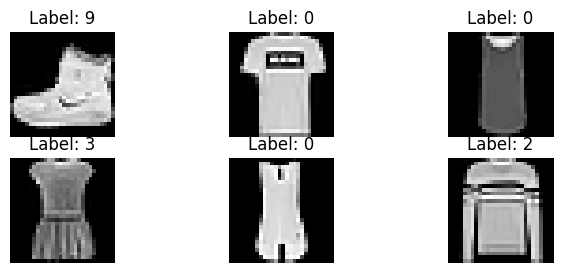

In [33]:
# Load data
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to [0,1]
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0


# Create the generator
datagen = ImageDataGenerator(
    rotation_range=10,        # rotate images randomly by up to 10 degrees
    zoom_range=0.1,           # zoom in/out by up to 10%
    width_shift_range=0.1,    # shift image left/right
    height_shift_range=0.1    # shift image up/down
)

# Fit the generator on the training data (needed only for some types of augmentations)
datagen.fit(x_train.reshape(-1, 28, 28, 1))

# Show first 6 images
plt.figure(figsize=(8,3))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [34]:
# Define a Simple Neural Network
model = models.Sequential([
    layers.Flatten(input_shape=(28,28,1)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Train the Model
'''history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)'''

history = model.fit(
    datagen.flow(x_train.reshape(-1, 28, 28, 1), y_train, batch_size=64),
    epochs=5,
    validation_data=(x_test.reshape(-1, 28, 28, 1), y_test)
)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 27ms/step - accuracy: 0.6543 - loss: 0.9373 - val_accuracy: 0.7733 - val_loss: 0.5717
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.7646 - loss: 0.6245 - val_accuracy: 0.8084 - val_loss: 0.5145
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.7813 - loss: 0.5725 - val_accuracy: 0.8098 - val_loss: 0.4871
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.7928 - loss: 0.5425 - val_accuracy: 0.8276 - val_loss: 0.4596
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.8009 - loss: 0.5240 - val_accuracy: 0.8247 - val_loss: 0.4591


In [36]:
# Evaluate Performance
test_loss, test_acc = model.evaluate(x_test.reshape(-1,28,28,1), y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8238 - loss: 0.4571
Test accuracy: 0.8247


In [38]:
# Make Predictions
predictions = model.predict(x_test[:5].reshape(-1,28,28,1))
for i, pred in enumerate(predictions):
    print(f"Image {i}: predicted {np.argmax(pred)}, actual {y_test[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Image 0: predicted 9, actual 9
Image 1: predicted 2, actual 2
Image 2: predicted 1, actual 1
Image 3: predicted 1, actual 1
Image 4: predicted 6, actual 6


# Extension Ideas
	•	Increase Complexity: Add additional hidden layers or change activation functions.
	•	Data Augmentation: Use `tf.keras.preprocessing.image.ImageDataGenerator` to augment training data.
	•	Different Dataset: Swap MNIST for Fashion-MNIST by replacing `tf.keras.datasets.mnist` with `fashion_mnist`.
	•	Visualization: Plot training and validation accuracy/loss curves:

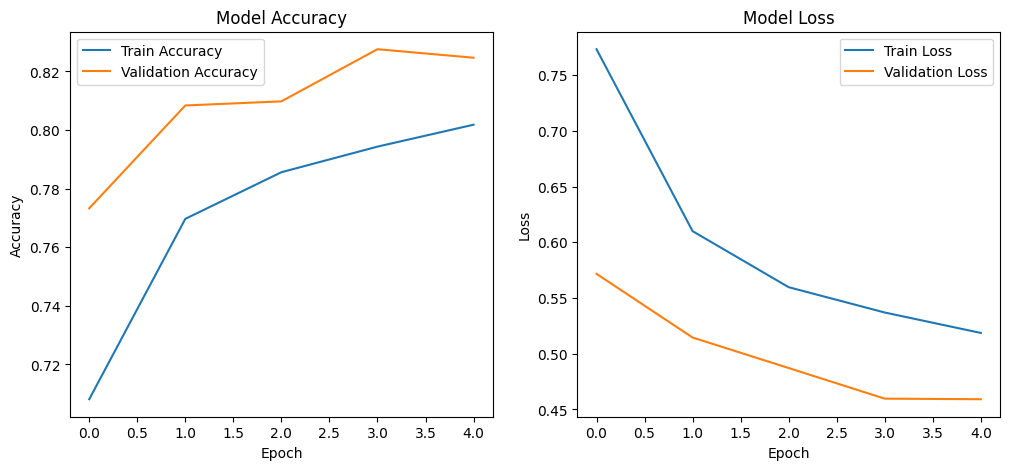

In [40]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Deliverables
	•	A working Colab notebook with all cells executed.
	•	Screenshots or printout of:
	•	Model summary.
	•	Training/validation accuracy curves.
	•	Final test accuracy.
	•	Sample predictions on test images.